In [6]:
import yfinance as yf
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [7]:
# Step 1: Download stock market data from Yahoo Finance
stock_data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [11]:
# Step 2: Feature Engineering
# Create moving averages and other relevant features
stock_data['MA_10'] = stock_data['Close'].rolling(window=10).mean()  # 10-day moving average
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()  # 50-day moving average
stock_data['Returns'] = stock_data['Close'].pct_change()  # Daily returns
stock_data['Volatility'] = stock_data['Returns'].rolling(window=10).std()  # 10-day volatility

# Drop any rows with NaN values due to rolling calculations
stock_data.dropna(inplace=True)

In [12]:
# Step 3: Define features (X) and target (y)
X = stock_data[['MA_10', 'MA_50', 'Volatility']]  # Features
y = stock_data['Close']  # Target: Stock closing price

In [13]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [14]:
# Step 5: Convert the data into DMatrix format for XGBoost
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

In [15]:
# Step 6: Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',            # Root Mean Squared Error
    'max_depth': 6,                   # Maximum depth of a tree
    'eta': 0.3,                       # Learning rate
}

In [16]:
# Step 7: Train the XGBoost model
model = xgb.train(params, train_data, num_boost_round=100, evals=[(test_data, 'eval')], early_stopping_rounds=10)

[0]	eval-rmse:47.10023
[1]	eval-rmse:32.35913
[2]	eval-rmse:22.20001
[3]	eval-rmse:15.06615
[4]	eval-rmse:10.61546
[5]	eval-rmse:7.96914
[6]	eval-rmse:6.66293
[7]	eval-rmse:6.12837
[8]	eval-rmse:6.02856
[9]	eval-rmse:6.05492
[10]	eval-rmse:6.13618
[11]	eval-rmse:6.16010
[12]	eval-rmse:6.22812
[13]	eval-rmse:6.24148
[14]	eval-rmse:6.27790
[15]	eval-rmse:6.36216
[16]	eval-rmse:6.37770
[17]	eval-rmse:6.39365
[18]	eval-rmse:6.40064


In [17]:
# Step 8: Make predictions on the test set
y_pred = model.predict(test_data)

In [18]:
# Step 9: Evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

RMSE: 6.4006


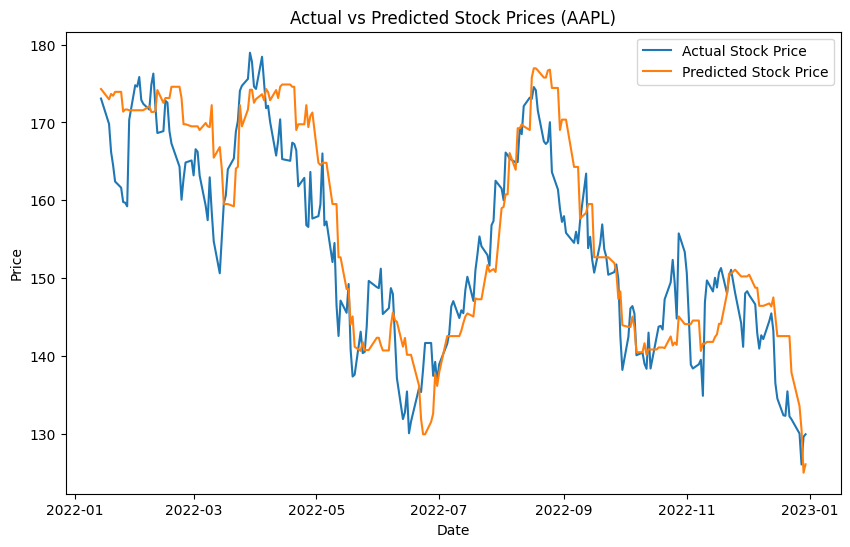

In [19]:
# Step 10: Plot the results
plt.figure(figsize=(10,6))
plt.plot(stock_data.index[-len(y_test):], y_test, label='Actual Stock Price')
plt.plot(stock_data.index[-len(y_pred):], y_pred, label='Predicted Stock Price')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Actual vs Predicted Stock Prices (AAPL)")
plt.show()